In [227]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%load_ext autoreload
%aimport health_plot_helper
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
cols = list(range(401))
cols.remove(1) # first name
cols.remove(2) # last name
cols.remove(3) # email
cols.remove(12) # company
cols.remove(13) # employee id
data = pd.read_csv('input/health_data.csv', low_memory=False, index_col='ID', usecols=cols)

# Data Sanitisation

In [185]:
# remove the string n/a and replace it with NaN like remaining empty value.
data.loc[data['Blood Group'] == 'n/a', 'Blood Group'] = np.NaN
# remove the 'A +' and 'A+' and make evrything 'A+'
data['Blood Group'] = data[['Blood Group']].applymap(lambda x: str(x).replace(" ", ""))

In [190]:
# creating age group
def ageGroup(age):
    if age == np.NaN:
        return np.NaN
    if age < 18:
        return '< 18'
    if 18 <= age < 30:
        return '18 - 30'
    if 30 <= age < 50:
        return '30 - 50'
    if 50 <= age < 70:
        return '50 - 70'
    if age > 70:
        return '> 70'

data['AgeGroup'] = data[['Age']].applymap(lambda x: ageGroup(x))

# Exploratory data Analysis (EDA)

Diagnostics Status
Not available    13829
expired              2
ready             6127
Name: Diagnostics Status, dtype: int64


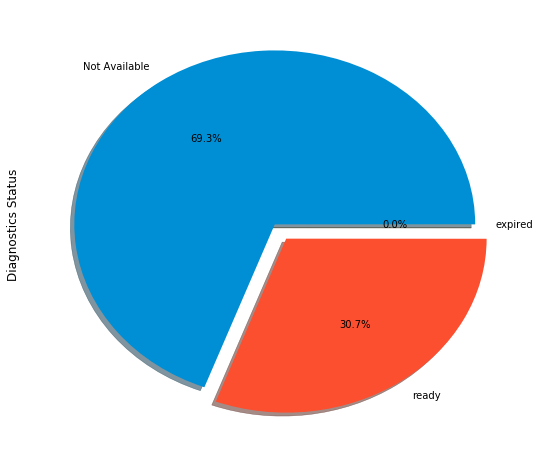

In [195]:
# https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
col_diagnostics_status = 'Diagnostics Status'
print(data[[col_diagnostics_status]].fillna('Not available').groupby(col_diagnostics_status)[col_diagnostics_status].count())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data[[col_diagnostics_status]].fillna('Not Available')[col_diagnostics_status].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',ax=ax,shadow=True)
plt.show()

In [103]:
data_diag_ready = data.loc[(data[col_diagnostics_status] == 'ready')]
data_diag_ready.groupby('Gender')['Gender'].count()

Gender
Female    1869
Male      4258
Name: Gender, dtype: int64

# Gender based distribution

In [186]:
pd.crosstab(data.Gender, data[[col_diagnostics_status]].fillna('N/A')[col_diagnostics_status],
            margins=True).style.background_gradient('summer_r')

Diagnostics Status,N/A,expired,ready,All
Gender,,,,
Female,4457,1,1869,6327
Male,9366,1,4258,13625
All,13823,2,6127,19952


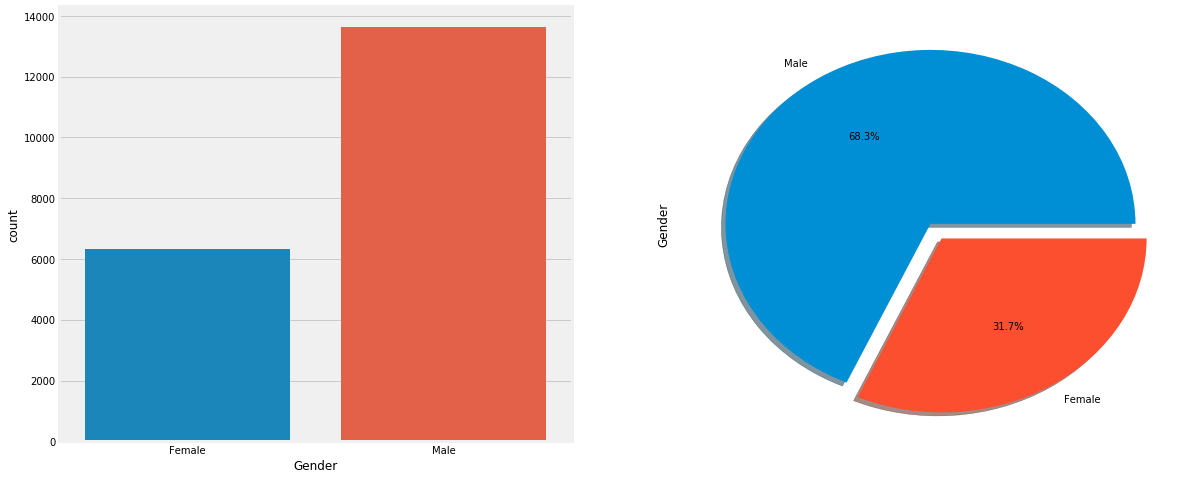

In [197]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot('Gender', data = data, ax = ax[0])
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
plt.show()

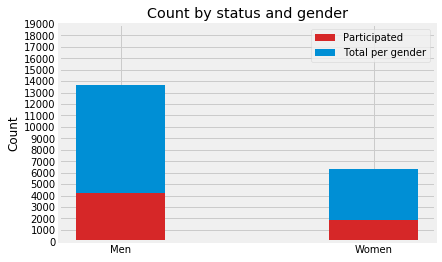

In [249]:
health_plot_helper.diag_gender_bar_graph(data)

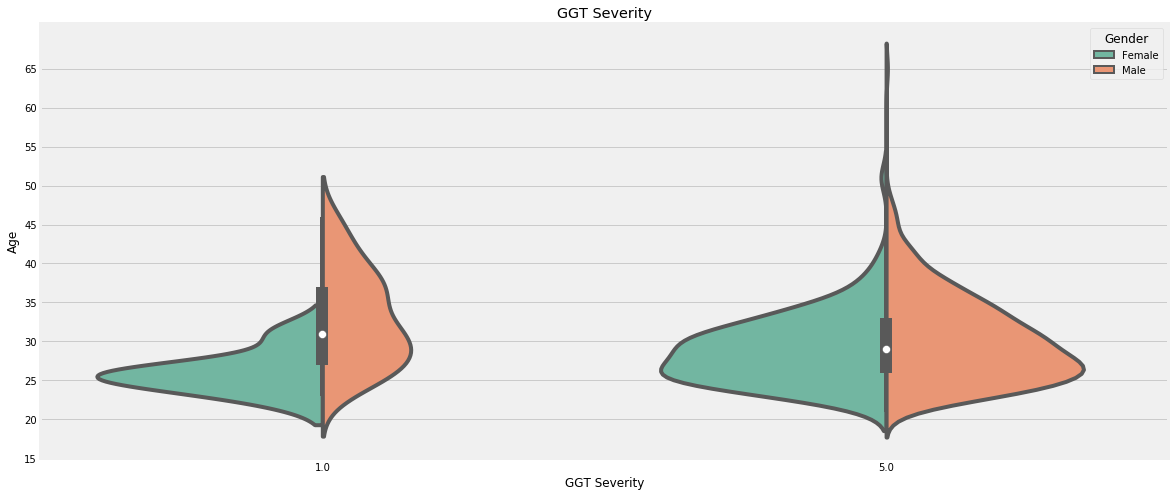

In [237]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.violinplot('GGT Severity', 'Age', hue='Gender', data=data, ax=ax, split=True, palette='Set2')
ax.set_title('GGT Severity')
ax.set_yticks(range(15,70,5))
plt.show()

In [242]:
severity = 'GGT Severity'
health_plot_helper.severityByAgeGroup(data, severity)

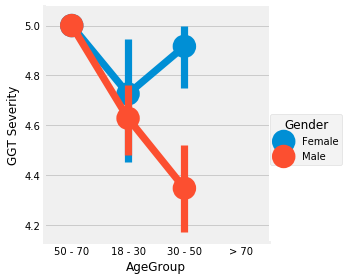

In [246]:
# Work in Progress.
sns.factorplot('AgeGroup', 'GGT Severity', hue='Gender', data = data)

# Blood Group Distribution

In [241]:
health_plot_helper.bloodGroupDistrib(data)

Blood Group,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
Female,98,9,23,0,141,9,159,12
Male,227,22,99,10,495,28,502,35


In [243]:
severity = 'GGT Severity'
health_plot_helper.severityByBloodGroup(data, severity)

In [268]:
health_plot_helper.AGE_GROUPS

['< 18', '18 - 29', '30 - 49', '50 - 79', '> 70']

  AgeGroup  GGT Severity  value
0  18 - 30           1.0     30
1  18 - 30           5.0    312
2  30 - 50           1.0     46
3  30 - 50           5.0    278
4  50 - 70           1.0      0
5  50 - 70           5.0      2


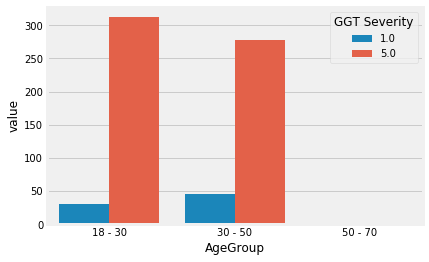

In [272]:
health_plot_helper.severityByAgeBarGraph(data, severity)

   AgeGroup  Gender  GGT Severity  value
0   18 - 30  Female           1.0      5
1   18 - 30  Female           5.0     68
2   18 - 30    Male           1.0     25
3   18 - 30    Male           5.0    244
4   30 - 50  Female           1.0      1
5   30 - 50  Female           5.0     47
6   30 - 50    Male           1.0     45
7   30 - 50    Male           5.0    231
8   50 - 70  Female           1.0      0
9   50 - 70  Female           5.0      1
10  50 - 70    Male           1.0      0
11  50 - 70    Male           5.0      1


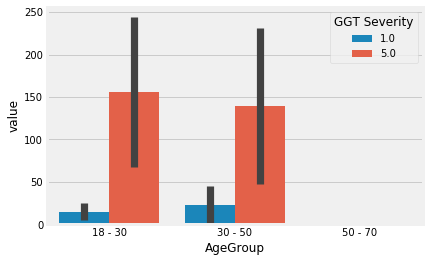

In [277]:
health_plot_helper.severityByAgeAndGenderBarGraph(data, severity)

GGT Severity By Age Group
  AgeGroup  GGT Severity  value
0  18 - 30           1.0     30
1  18 - 30           5.0    312
2  30 - 50           1.0     46
3  30 - 50           5.0    278
4  50 - 70           1.0      0
5  50 - 70           5.0      2
GGT Severity By Age Group and Gender
   AgeGroup  Gender  GGT Severity  value
0   18 - 30  Female           1.0      5
1   18 - 30  Female           5.0     68
2   18 - 30    Male           1.0     25
3   18 - 30    Male           5.0    244
4   30 - 50  Female           1.0      1
5   30 - 50  Female           5.0     47
6   30 - 50    Male           1.0     45
7   30 - 50    Male           5.0    231
8   50 - 70  Female           1.0      0
9   50 - 70  Female           5.0      1
10  50 - 70    Male           1.0      0
11  50 - 70    Male           5.0      1
GGT Severity  - Male
  AgeGroup  GGT Severity  value
0  18 - 30           1.0     25
1  18 - 30           5.0    244
2  30 - 50           1.0     45
3  30 - 50           5.0    231

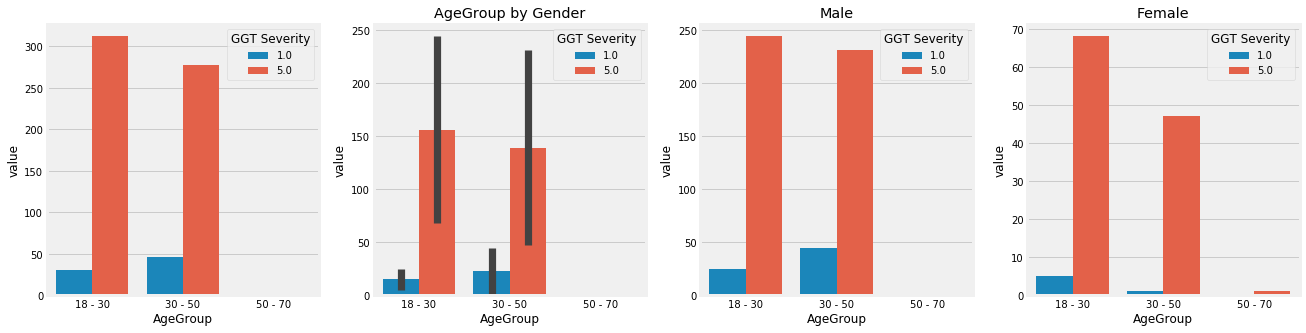

In [301]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))
print(severity, "By Age Group")
health_plot_helper.severityByAgeBarGraph(data, severity, ax[0])
print(severity, "By Age Group and Gender")
health_plot_helper.severityByAgeAndGenderBarGraph(data, severity, ax[1])
print(severity, " - Male")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Male'], severity, ax[2]).set_title('Male')
print(severity, " - Female")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Female'], severity, ax[3]).set_title('Female')
plt.show()

Eosinophils Severity By Age Group
  AgeGroup  Eosinophils Severity  value
0  18 - 30                   1.0    393
1  18 - 30                   5.0   3809
2  30 - 50                   1.0    212
3  30 - 50                   5.0   2003
4  50 - 70                   1.0      0
5  50 - 70                   5.0     11
Eosinophils Severity By Age Group and Gender
   AgeGroup  Gender  Eosinophils Severity  value
0   18 - 30  Female                   1.0    104
1   18 - 30  Female                   5.0   1392
2   18 - 30    Male                   1.0    289
3   18 - 30    Male                   5.0   2417
4   30 - 50  Female                   1.0     24
5   30 - 50  Female                   5.0    440
6   30 - 50    Male                   1.0    188
7   30 - 50    Male                   5.0   1563
8   50 - 70  Female                   1.0      0
9   50 - 70  Female                   5.0      3
10  50 - 70    Male                   1.0      0
11  50 - 70    Male                   5.0      8
Eosi

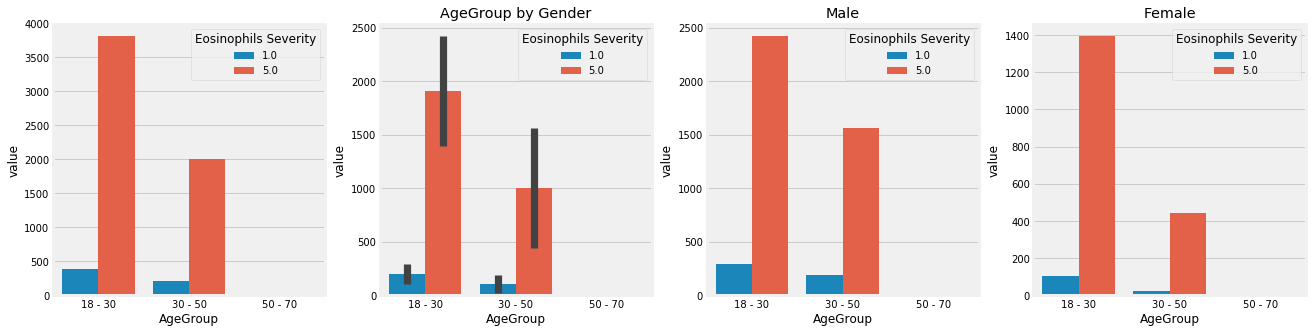

In [302]:
severity = 'Eosinophils Severity'
f, ax = plt.subplots(1, 4, figsize=(20, 5))
print(severity, "By Age Group")
health_plot_helper.severityByAgeBarGraph(data, severity, ax[0])
print(severity, "By Age Group and Gender")
health_plot_helper.severityByAgeAndGenderBarGraph(data, severity, ax[1])
print(severity, " - Male")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Male'], severity, ax[2]).set_title('Male')
print(severity, " - Female")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Female'], severity, ax[3]).set_title('Female')
plt.show()

In [304]:
health_plot_helper.severityByAgeGroup(data, severity)

Glucose Fasting Severity By Age Group
  AgeGroup  Glucose Fasting Severity  value
0  18 - 30                       1.0     34
1  18 - 30                       2.0    285
2  18 - 30                       5.0   3885
3  30 - 50                       1.0     71
4  30 - 50                       2.0    325
5  30 - 50                       5.0   1821
6  50 - 70                       1.0      1
7  50 - 70                       2.0      4
8  50 - 70                       5.0      6
Glucose Fasting Severity By Age Group and Gender
   AgeGroup  Gender  Glucose Fasting Severity  value
0   18 - 30  Female                       1.0      9
1   18 - 30  Female                       2.0     78
2   18 - 30  Female                       5.0   1412
3   18 - 30    Male                       1.0     25
4   18 - 30    Male                       2.0    207
5   18 - 30    Male                       5.0   2473
6   30 - 50  Female                       1.0      6
7   30 - 50  Female                       2.0    

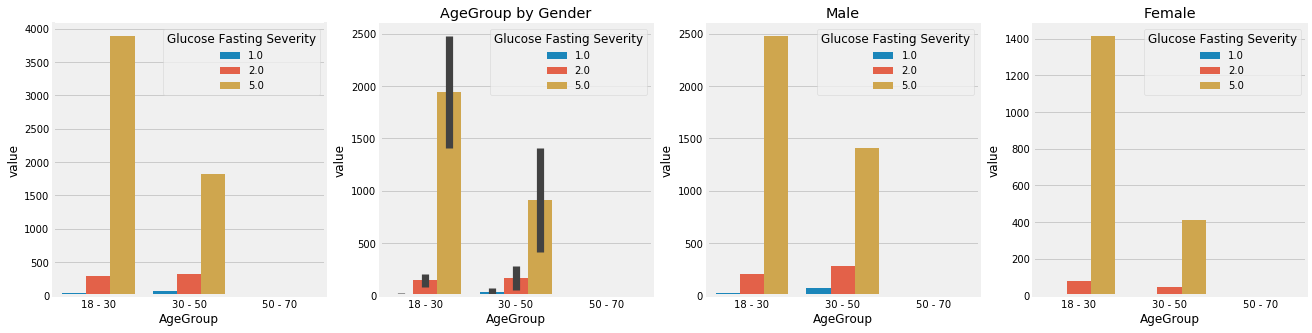

In [307]:
severity = 'Glucose Fasting Severity'
f, ax = plt.subplots(1, 4, figsize=(20, 5))
print(severity, "By Age Group")
health_plot_helper.severityByAgeBarGraph(data, severity, ax[0])
print(severity, "By Age Group and Gender")
health_plot_helper.severityByAgeAndGenderBarGraph(data, severity, ax[1])
print(severity, " - Male")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Male'], severity, ax[2]).set_title('Male')
print(severity, " - Female")
health_plot_helper.severityByAgeBarGraph(data.loc[data['Gender'] == 'Female'], severity, ax[3]).set_title('Female')
plt.show()

In [308]:
health_plot_helper.severityByAgeGroup(data, severity)

AgeGroup,18 - 30,30 - 50,50 - 70,> 70
Gender,,,,
Female,4368,1337,10,0
Male,7813,4589,35,1


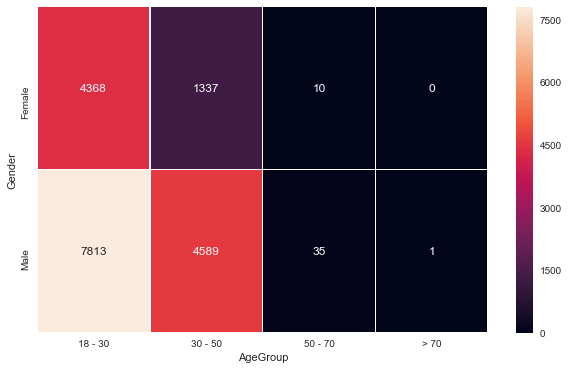

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ct = pd.crosstab(data["AgeGroup"], data["Gender"])
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked = stacked.pivot("Gender", "AgeGroup", "value")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(stacked, annot=True, fmt="d", linewidths=.5, ax=ax)

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,53.0,54.0,55.0,56.0,57.0,58.0,61.0,63.0,65.0,1014.0
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0,2,7,23,112,468,677,778,841,605,...,0,1,0,1,1,0,2,0,0,0
Male,1,4,13,26,156,675,954,1190,1480,1185,...,5,3,2,1,0,1,0,1,1,1


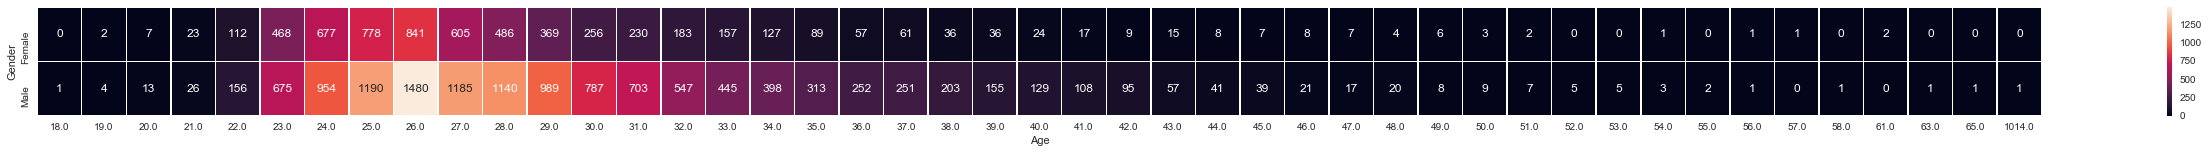

In [334]:
ct = pd.crosstab(data["Age"], data["Gender"])
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked = stacked.pivot("Gender", "Age", "value")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(40, 2))
sns.heatmap(stacked, annot=True, fmt="d", linewidths=.5, ax=ax)
stacked

In [336]:
health_plot_helper.severityCrossTab(data, [data['Basophils Severity'], data['Eosinophils Severity'], data['ESR Severity']])